# Visualizing Contour Elevations from Raster Data

Author: Matt Oakley

Digital elevation models (DEMs) are data in the format of a 2D array where each cell has a corresponding elevation value. Therefore, it may sometimes prove useful to visualize these elevation models with mechanisms such as contour lines. Fortunately, this is fairly easy to accomplish in Python using packages such as GDAL and Matplotlib.

## Objectives

- Read in DEM data
- Visualize data with Matplotlib

## Dependencies

- GDAL
- Matplotlib

In [ ]:
!pip install gdal
!pip install matplotlib

In [1]:
from osgeo import gdal
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

%matplotlib inline

## Read in DEM Data

The first objective we'll have to accomplish is reading in our data. We can use GDAL in order to open the file and read it in as a 2D array. Additionally, it is important to note that our DEM file has NaN values which will later cause Matplotlib to fail. Therefore, we'll also mask these values out so that Matplotlib will be unaware of them.

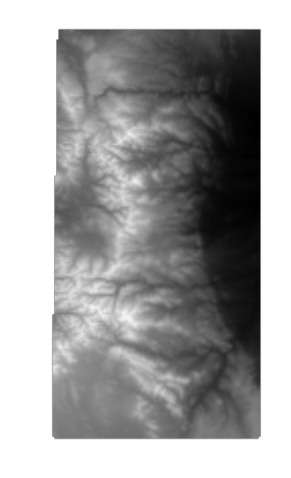

In [2]:
#Function to open the data and create a 2D array from it
def create_array(filename, nan_bit):
    raster = gdal.Open(filename)
    band = raster.GetRasterBand(1)
    if nan_bit == 0:
        nodataval = band.GetNoDataValue()
        array = band.ReadAsArray()
        array[array == nodataval] = np.nan
    else:
        array = band.ReadAsArray()
    return array

filename = "../data/front_range_dem.tif"
data_array = create_array(filename, 0)

#Plot our 2D array
plt.figure(figsize = (8, 8))
plt.axis("off")
img = plt.imshow(data_array, cmap = "gray")

## Visualize Data with Matplotlib

Now that we've read our data in, we're ready to visualize the elevation using contour lines within Matplotlib (Note: We will be re-reading in the data again here due to NaN values).

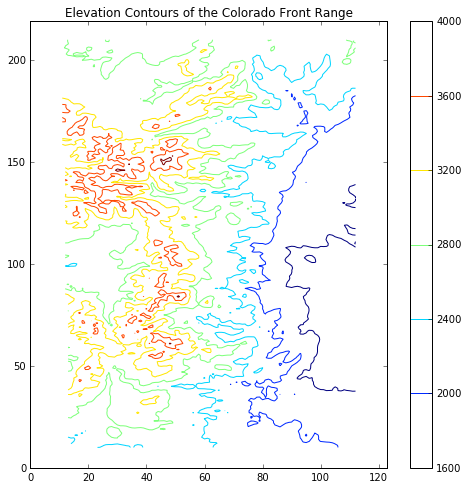

In [3]:
#Function to mask out NaN values
def mask_NaNs(raster_array):
    raster_array = np.ma.array(raster_array, mask=raster_array < .1)
    return raster_array

#Re-read in the data and mask out NaN values 
data_array = create_array(filename, 1)
data_array = mask_NaNs(data_array)

#Plot out data with Matplotlib's 'contour'
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)
plt.contour(data_array)
plt.title("Elevation Contours of the Colorado Front Range")
cbar = plt.colorbar()
plt.show()

Matplotlib has a multitude of different ways to visualize data. For instance, we just used the 'contour' module to plot our data. Let's do it again but with 'contourf'.

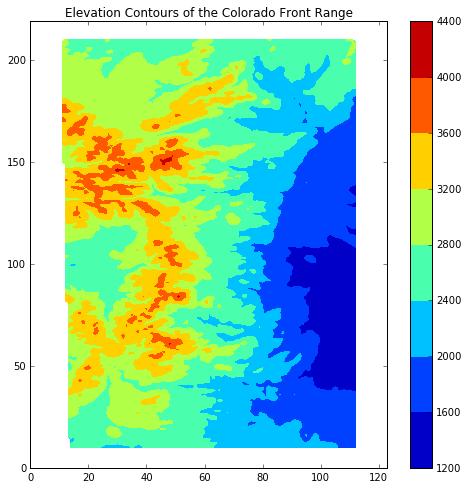

In [4]:
#Plot our data with Matplotlib's 'contourf'
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)
plt.contourf(data_array)
plt.title("Elevation Contours of the Colorado Front Range")
cbar = plt.colorbar()
plt.show()